### NLTK工具包安装

非常实用的文本处理工具，主要用于英文数据，历史悠久~

In [3]:
import nltk #pip install nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

#### 分词

In [10]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [11]:
input_str = "Today's weather is good, very windy and sunny, we have no classes in the afternoon,We have to play basketball tomorrow."

In [12]:
tokens = word_tokenize(input_str)

In [13]:
tokens = [word.lower() for word in tokens]
tokens[:5]

['today', "'s", 'weather', 'is', 'good']

#### Text对象

In [15]:
help(nltk.text)

Help on module nltk.text in nltk:

NAME
    nltk.text

DESCRIPTION
    This module brings together a variety of NLTK functionality for
    text analysis, and provides simple, interactive interfaces.
    Functionality includes: concordancing, collocation discovery,
    regular expression search over tokenized strings, and
    distributional similarity.

CLASSES
    builtins.object
        ConcordanceIndex
        ContextIndex
        Text
            TextCollection
        TokenSearcher
    
    class ConcordanceIndex(builtins.object)
     |  ConcordanceIndex(tokens, key=<function ConcordanceIndex.<lambda> at 0x0000021D7C763790>)
     |  
     |  An index that can be used to look up the offset locations at which
     |  a given word occurs in a document.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, tokens, key=<function ConcordanceIndex.<lambda> at 0x0000021D7C763790>)
     |      Construct a new concordance index.
     |      
     |      :param tokens: The do

创建一个Text对象，方便后续操作

In [8]:
t = Text(tokens)

In [9]:
# 统计某个词出现的次数
t.count('good')

1

In [10]:
# 位置
t.index('good')

4

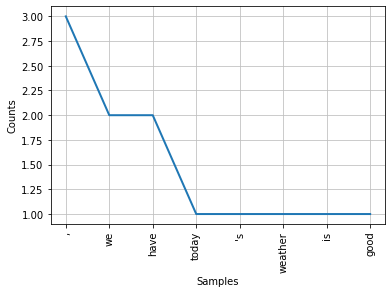

In [13]:
# 展示出现次数前八
t.plot(8)

#### 停用词

可以看一下说明中的介绍

In [4]:
from nltk.corpus import stopwords

stopwords.readme().replace('\n', ' ')  # 打印说明文档

'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

In [5]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [6]:
stopwords.raw('english').replace('\n',' ')

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't "

In [16]:
test_words = [word.lower() for word in tokens]
test_words_set = set(test_words)

In [23]:
test_words_set.intersection(set(stopwords.words('english')))

{'and', 'have', 'in', 'is', 'no', 'the', 'to', 'very', 'we'}

#### 过滤掉停用词

In [17]:
filtered = [w for w in test_words_set if(w not in stopwords.words('english'))]

In [18]:
filtered

['weather',
 'today',
 '.',
 'good',
 "'s",
 'afternoon',
 'play',
 'sunny',
 'classes',
 ',',
 'basketball',
 'tomorrow',
 'windy']

#### 词性标注

In [19]:
nltk.download() #第三个

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
from nltk import pos_tag
tags = pos_tag(tokens)
tags

[('today', 'NN'),
 ("'s", 'POS'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 (',', ','),
 ('very', 'RB'),
 ('windy', 'JJ'),
 ('and', 'CC'),
 ('sunny', 'JJ'),
 (',', ','),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('no', 'DT'),
 ('classes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('afternoon', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('play', 'VB'),
 ('basketball', 'NN'),
 ('tomorrow', 'NN'),
 ('.', '.')]

| POS Tag |指代 |
| --- | --- |
| CC | 并列连词 |
| CD | 基数词 |
| DT | 限定符|
| EX | 存在词|
| FW |外来词 |
| IN | 介词或从属连词|
| JJ | 形容词 |
| JJR | 比较级的形容词  |
| JJS | 最高级的形容词 |
| LS | 列表项标记 |
| MD | 情态动词 |
| NN |名词单数|
| NNS | 名词复数  |
| NNP |专有名词|
| PDT | 前置限定词 |
| POS | 所有格结尾|
| PRP | 人称代词  |
| PRP$ | 所有格代词 |
| RB |副词 |
| RBR | 副词比较级 |
| RBS | 副词最高级 |
| RP | 小品词 |
| UH | 感叹词 |
| VB |动词原型 |
| VBD | 动词过去式 |
| VBG |动名词或现在分词 |
| VBN |动词过去分词|
| VBP |非第三人称单数的现在时|
| VBZ | 第三人称单数的现在时 |
| WDT |以wh开头的限定词 |

#### 分块

In [6]:
from nltk.chunk import RegexpParser

In [15]:
sentence = [('the','DT'),('little','JJ'),('yellow','JJ'),('dog','NN'),('died','VBD')]
grammer = "MY_NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammer) #生成规则
result = cp.parse(sentence) #进行分块
print(result)

result.draw() #调用matplotlib库画出来

(S (MY_NP the/DT little/JJ yellow/JJ dog/NN) died/VBD)


#### 命名实体识别

In [16]:
nltk.download() 
#maxent_ne_chunke
#words

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
from nltk import ne_chunk
sentence = "Edison went to Tsinghua University today."
print(ne_chunk(pos_tag(word_tokenize(sentence))))

(S
  (PERSON Edison/NNP)
  went/VBD
  to/TO
  (ORGANIZATION Tsinghua/NNP University/NNP)
  today/NN
  ./.)


#### 数据清洗实例

In [18]:
import re
from nltk.corpus import stopwords
# 输入数据
s = '    RT @Amila #Test\nTom\'s newly listed Co  &amp; Mary\'s unlisted     Group to supply tech for nlTK.\nh $TSLA $AAPL https:// t.co/x34afsfQsh'

#指定停用词
cache_english_stopwords = stopwords.words('english')

def text_clean(text):
    print('原始数据:', text, '\n')
    
    # 去掉HTML标签(e.g. &amp;)
    text_no_special_entities = re.sub(r'\&\w*;|#\w*|@\w*', '', text)
    print('去掉特殊标签后的:', text_no_special_entities, '\n')
    
    # 去掉一些价值符号
    text_no_tickers = re.sub(r'\$\w*', '', text_no_special_entities) 
    print('去掉价值符号后的:', text_no_tickers, '\n')
    
    # 去掉超链接
    text_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', text_no_tickers)
    print('去掉超链接后的:', text_no_hyperlinks, '\n')

    # 去掉一些专门名词缩写，简单来说就是字母比较少的词
    text_no_small_words = re.sub(r'\b\w{1,2}\b', '', text_no_hyperlinks) 
    print('去掉专门名词缩写后:', text_no_small_words, '\n')
    
    # 去掉多余的空格
    text_no_whitespace = re.sub(r'\s\s+', ' ', text_no_small_words)
    text_no_whitespace = text_no_whitespace.lstrip(' ') 
    print('去掉空格后的:', text_no_whitespace, '\n')
    
    # 分词
    tokens = word_tokenize(text_no_whitespace)
    print('分词结果:', tokens, '\n')    
          
    # 去停用词
    list_no_stopwords = [i for i in tokens if i not in cache_english_stopwords]
    print('去停用词后结果:', list_no_stopwords, '\n')
    # 过滤后结果
    text_filtered =' '.join(list_no_stopwords) # ''.join() would join without spaces between words.
    print('过滤后:', text_filtered)

text_clean(s)

原始数据:     RT @Amila #Test
Tom's newly listed Co  &amp; Mary's unlisted     Group to supply tech for nlTK.
h $TSLA $AAPL https:// t.co/x34afsfQsh 

去掉特殊标签后的:     RT  
Tom's newly listed Co   Mary's unlisted     Group to supply tech for nlTK.
h $TSLA $AAPL https:// t.co/x34afsfQsh 

去掉价值符号后的:     RT  
Tom's newly listed Co   Mary's unlisted     Group to supply tech for nlTK.
h   https:// t.co/x34afsfQsh 

去掉超链接后的:     RT  
Tom's newly listed Co   Mary's unlisted     Group to supply tech for nlTK.
h    

去掉专门名词缩写后:       
Tom' newly listed    Mary' unlisted     Group  supply tech for nlTK.
    

去掉空格后的: Tom' newly listed Mary' unlisted Group supply tech for nlTK.  

分词结果: ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'for', 'nlTK', '.'] 

去停用词后结果: ['Tom', "'", 'newly', 'listed', 'Mary', "'", 'unlisted', 'Group', 'supply', 'tech', 'nlTK', '.'] 

过滤后: Tom ' newly listed Mary ' unlisted Group supply tech nlTK .
